In [1]:
# import the libraries

Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras import utils

Reading the dataset

In [4]:
#load the dataset
df = pd.read_csv("/content/spam.csv", encoding='cp1252')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


Text(0.5, 1.0, 'No. of Hams and Spams')

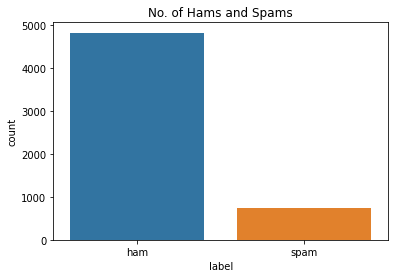

In [7]:
sns.countplot(data=df,x='v1')
plt.xlabel("label")
plt.title("No. of Hams and Spams")

Preprocessing the dataset

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
x=df.v2
y=df.v1
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

Splitting the dataset

In [10]:
#Splitting of the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
#tokenization and sequentializing the data
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = utils.pad_sequences(sequences,maxlen=max_len)

In [12]:
sequences_matrix.shape

(4457, 150)

In [13]:
sequences_matrix.ndim

2

In [14]:
#RNN will take the input in 3D format
sequences_matrix = np.reshape(sequences_matrix,(4457,150,1))

In [15]:
sequences_matrix.ndim

3

In [16]:
print(y_train.shape)

(4457, 1)


Creating RNN Model

In [17]:
#initializing the model
model = Sequential()

In [18]:
#Adding layers

In [19]:
model.add(Embedding(max_words,50,input_length=max_len))

In [20]:
model.add(LSTM(units=64,input_shape=(sequences_matrix.shape[1],1),return_sequences=True))

In [21]:
model.add(Dropout(0.2))

In [22]:
model.add(LSTM(units=64,return_sequences=True))

In [23]:
model.add(Dropout(0.2))

In [24]:
model.add(LSTM(units=64,return_sequences=True))

In [25]:
model.add(Dropout(0.2))

In [26]:
model.add(LSTM(units=50)) 

In [27]:
model.add(Dense(units = 256,activation = 'relu'))

In [28]:
#output layer
model.add(Dense(units=1,activation='sigmoid'))

In [29]:
#model of the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 150, 64)           29440     
                                                                 
 dropout (Dropout)           (None, 150, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 64)           33024     
                                                                 
 dropout_1 (Dropout)         (None, 150, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150, 64)           33024     
                                                                 
 dropout_2 (Dropout)         (None, 150, 64)           0

Compiling the model

In [30]:
#compilation of the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

Fitting the model

In [31]:
#Training the model
tr = model.fit(sequences_matrix,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 52s 1s/step - loss: 0.4487 - accuracy: 0.8651 - val_loss: 0.4123 - val_accuracy: 0.8554
Epoch 2/10
28/28 [==============================] - 29s 1s/step - loss: 0.3354 - accuracy: 0.8701 - val_loss: 0.2298 - val_accuracy: 0.9137
Epoch 3/10
28/28 [==============================] - 33s 1s/step - loss: 0.1036 - accuracy: 0.9697 - val_loss: 0.0821 - val_accuracy: 0.9776
Epoch 4/10
28/28 [==============================] - 30s 1s/step - loss: 0.0592 - accuracy: 0.9849 - val_loss: 0.0825 - val_accuracy: 0.9787
Epoch 5/10
28/28 [==============================] - 30s 1s/step - loss: 0.0372 - accuracy: 0.9902 - val_loss: 0.0818 - val_accuracy: 0.9832
Epoch 6/10
28/28 [==============================] - 30s 1s/step - loss: 0.0260 - accuracy: 0.9947 - val_loss: 0.0835 - val_accuracy: 0.9821
Epoch 7/10
28/28 [==============================] - 30s 1s/step - loss: 0.0208 - accuracy: 0.9955 - val_loss: 0.0887 - val_accuracy: 0.9854
Epoch 8/10
28/28 [==

Saving the model

In [32]:
#Saving the model
model.save("spam_detection_mod.h5")

Testing the model

In [33]:
#testing the model
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = utils.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,y_test)

35/35 [==============================] - 5s 83ms/step - loss: 0.0954 - accuracy: 0.9821


In [34]:
l = accr[0]
a =accr[1]
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(l,a))

Test set
  Loss: 0.095
  Accuracy: 0.982


Accuracy and Loss graph

In [35]:
losses = tr.history["loss"]
train_acc = tr.history["accuracy"]
epoches = list(range(1,11))

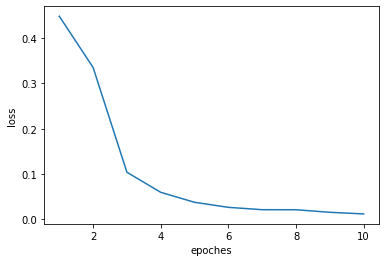

In [36]:
plt.plot(epoches,losses)
plt.xlabel("epoches")
plt.ylabel("loss")
plt.show()

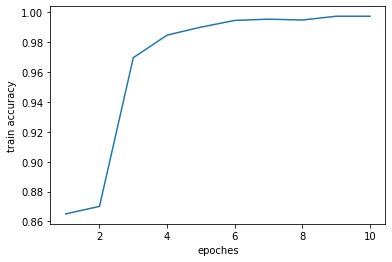

In [37]:
plt.plot(epoches,train_acc)
plt.xlabel("epoches")
plt.ylabel("train accuracy")
plt.show()